(100, 7)


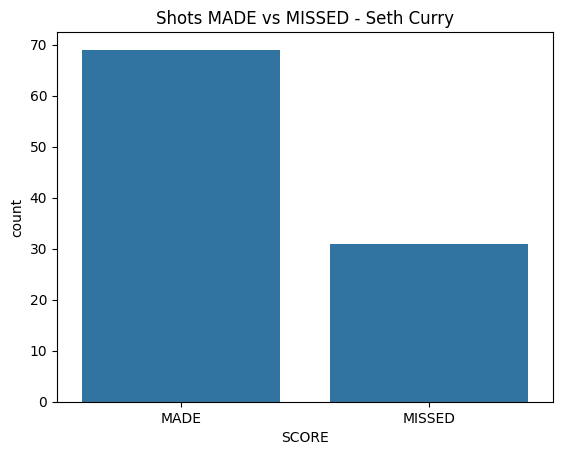

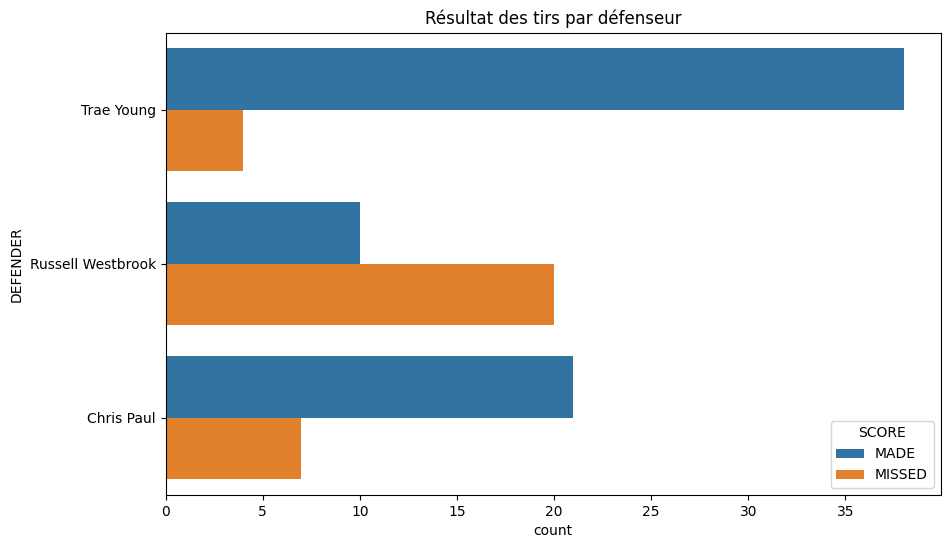

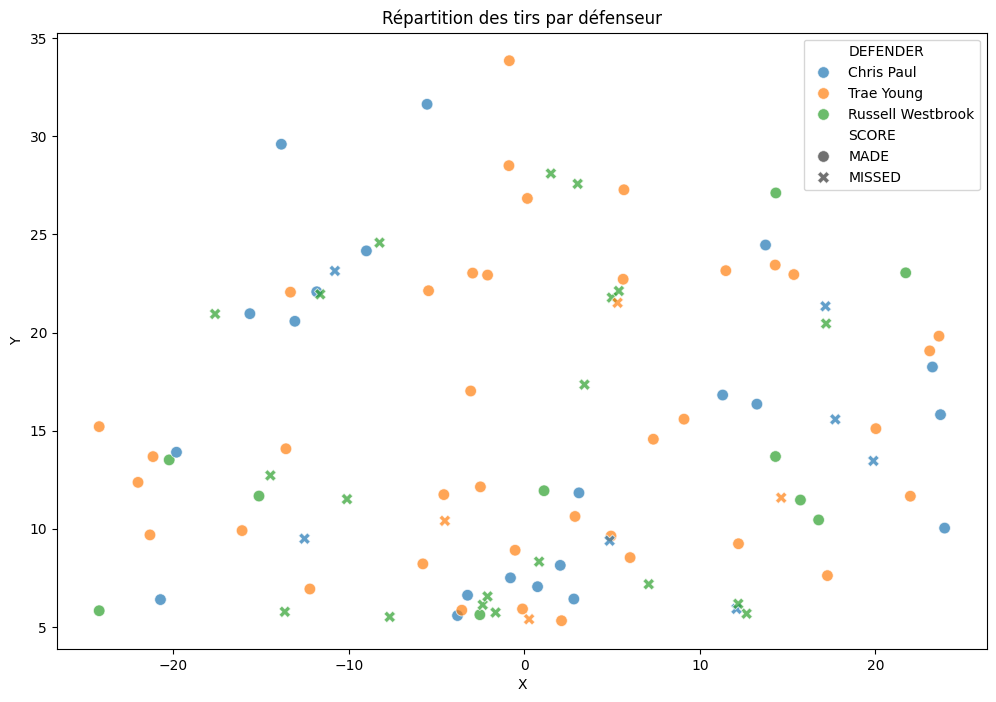

      RANGE  TotalShots  MadeShots  SuccessRate
0    (0, 4)          16         11    68.750000
1  (10, 14)          12          5    41.666667
2  (15, 19)          18         13    72.222222
3  (20, 24)          30         20    66.666667
4  (25, 29)          12         12   100.000000
5    (5, 9)          12          8    66.666667


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/nba_shooting_clean.csv")
print(df.shape)

# MADE vs MISSED global
sns.countplot(data=df, x="SCORE")
plt.title("Shots MADE vs MISSED - Seth Curry")
plt.show()

# MADE vs MISSED par défenseur
plt.figure(figsize=(10,6))
sns.countplot(data=df, y="DEFENDER", hue="SCORE", order=df['DEFENDER'].value_counts().index)
plt.title("Résultat des tirs par défenseur")
plt.show()

# Scatterplot de position des tirs
plt.figure(figsize=(12,8))
sns.scatterplot(
    data=df,
    x="X",
    y="Y",
    hue="DEFENDER",
    style="SCORE",
    s=70,
    alpha=0.7
)
plt.title("Répartition des tirs par défenseur")
plt.show()

# Réussite par range
range_total = df.groupby("RANGE").size().reset_index(name="TotalShots")
range_made = df[df['SCORE']=="MADE"].groupby("RANGE").size().reset_index(name="MadeShots")
range_success = pd.merge(range_total, range_made, on="RANGE", how="left").fillna(0)
range_success["SuccessRate"] = range_success["MadeShots"] / range_success["TotalShots"] * 100
print(range_success)
